# Supermarket Sales Analysis

## Objective

The objective of this analysis is to assess candidates' skills in data cleaning, exploratory data analysis (EDA), and basic predictive modeling using a dataset of supermarket sales. This will involve preparing and analyzing data to derive meaningful insights and creating a model to predict purchase costs.

---

## Dataset Overview

The dataset contains detailed records of supermarket sales, including attributes such as purchase date, product category, quantity sold, unit price, total cost, payment method, and branch location. This data provides a comprehensive view of sales activity over several months and will be used to perform analysis and predictive modeling.
[Dataset]('https://www.kaggle.com/datasets/lovishbansal123/sales-of-a-supermarket/data?select=supermarket_sales.csv')

---

## Task Outline

### 1. Data Cleaning and Preparation
   - **Handling Missing Values, Duplicates, and Outliers:** Identify and address any missing values, duplicated records, or outliers that may affect analysis.
   - **Data Type Conversion:** Ensure data types are accurate, including formatting dates correctly.
   - **Descriptive Statistics:** Generate summary statistics, such as average unit price and total sales per branch, to provide a baseline understanding of the data.

### 2. Exploratory Data Analysis (EDA)
   - **Trends Analysis:** Visualize total sales by month and branch to identify any seasonal patterns or branch-specific trends.
   - **Category Insights:** Determine the top product categories in terms of quantity sold and revenue generated.
   - **Customer Insights:** Analyze the popularity of payment methods across branches, highlighting any differences in customer preferences (e.g., cash vs. credit card).

### 3. Basic Predictive Modeling
   - **Objective:** Build a model to predict the total cost of a purchase based on product category, quantity, unit price, and branch.
   - **Modeling Approach:** Split the data into training and test sets, then train a linear regression or decision tree model.
   - **Evaluation Metric:** Use Mean Absolute Error (MAE) or Mean Squared Error (MSE) to evaluate the model’s predictive performance.

### 4. Insights and Recommendations
   - **Key Findings:** Summarize insights derived from the EDA, such as identifying top-performing branches and high-revenue product categories.
   - **Actionable Recommendations:** Provide 2–3 recommendations based on the findings and model predictions. This might include strategies for product promotions, branch-specific offers, or targeting popular payment methods.

---


In [1]:
# Import necessary libraries
import pandas as pd       # For data manipulation and analysis
import numpy as np        # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For data visualization

In [6]:
# Importing Data
file_path = 'supermarket_sales.csv'
data = pd.read_csv(file_path)

In [16]:
# Viewing data
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Data Cleaning and Preparation

In [7]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [9]:
# Checking number of rows
data.shape[0]

1000

In [11]:
# Checking for duplicates
data.duplicated().sum()

0

In [12]:
# Remove duplicates, if any
data = data.drop_duplicates()

In [14]:
# Counting rows
data.shape[0]

1000

In [15]:
# Handling Outliers
''' This code identifies outliers in the 'Quantity' column using the IQR method 
and caps them to ensure that the data remains within a specified range, which helps to 
mitigate the effect of extreme values on analysis or modeling.'''
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Quantity'] = np.where(data['Quantity'] < lower_bound, lower_bound, data['Quantity'])
data['Quantity'] = np.where(data['Quantity'] > upper_bound, upper_bound, data['Quantity'])


### Datatype Conversion

In [17]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [18]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Generate Descriptive Statistics

In [19]:
# Average unit price
average_unit_price = data['Unit price'].mean()
print("Average Unit Price: $", round(average_unit_price, 2))

Average Unit Price: $ 55.67


In [20]:
# Total sales per branch
total_sales_per_branch = data.groupby('Branch')['Total'].sum()
print("\nTotal Sales per Branch:\n", total_sales_per_branch)


Total Sales per Branch:
 Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


In [21]:
# Additional summary statistics
summary_statistics = data.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
         Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000             1.000000e+03   
mean   2019-02-14 00:05:45.600000   307.58738             4.761905e+00   
min           2019-01-01 00:00:00    10.17000             4.761905e+00   
25%           2019-01-24 00:00:00   118.49750             4.761905e+00   
50%           2019-02-13 00:00:00   241.76000             

## Exploratory Data Analysis (EDA)

### Trends Analysis: Total Sales by Month and Branch

In [22]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

In [24]:
data['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [25]:
data['Month'] = data['Date'].dt.month
data['Month'].head()

0    1
1    3
2    3
3    1
4    2
Name: Month, dtype: int32

In [26]:
# Calculate total sales per month and branch
monthly_sales = data.groupby(['Month', 'Branch'])['Total'].sum().unstack()

<Figure size 1000x600 with 0 Axes>

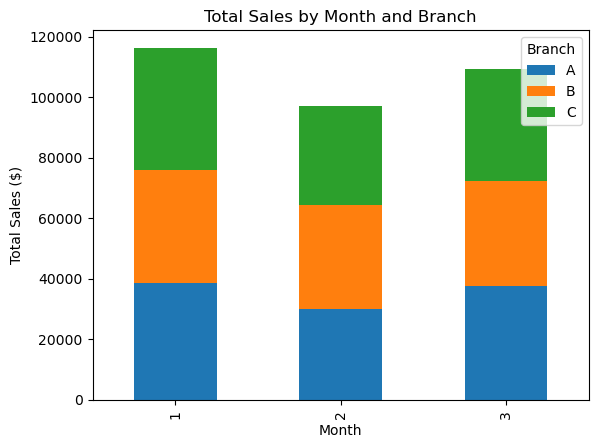

In [27]:
# total sales by month and branch
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', stacked=True)
plt.title("Total Sales by Month and Branch")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.legend(title="Branch")
plt.show();

### Category Insights: Top Product Categories by Quantity Sold and Revenue

In [28]:
# Group by 'Product line' to find total quantity and revenue per category
category_sales = data.groupby('Product line').agg({'Quantity': 'sum', 'Total': 'sum'}).sort_values(by='Total', ascending=False)

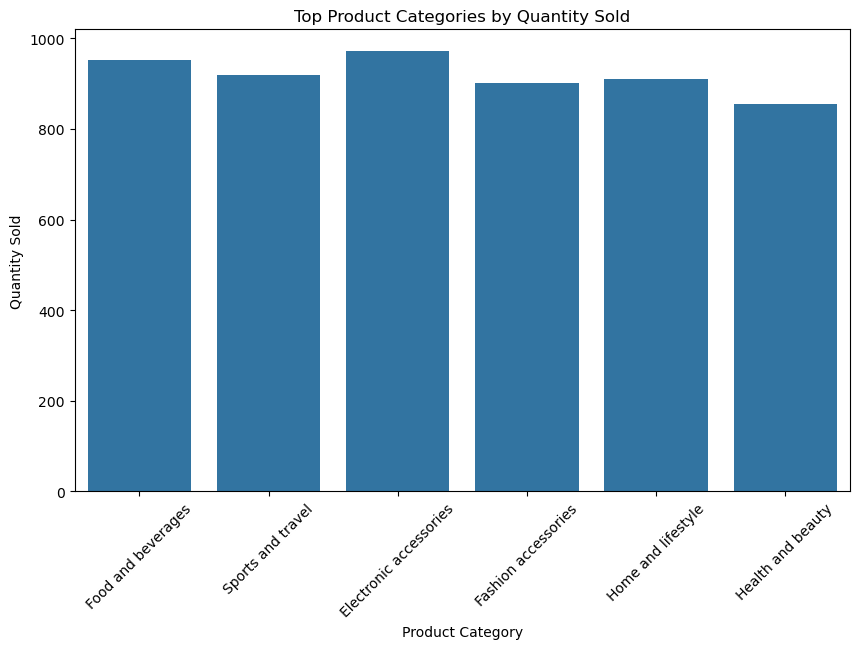

In [29]:
# Top product categories by quantity sold
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales['Quantity'])
plt.title("Top Product Categories by Quantity Sold")
plt.xlabel("Product Category")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show();

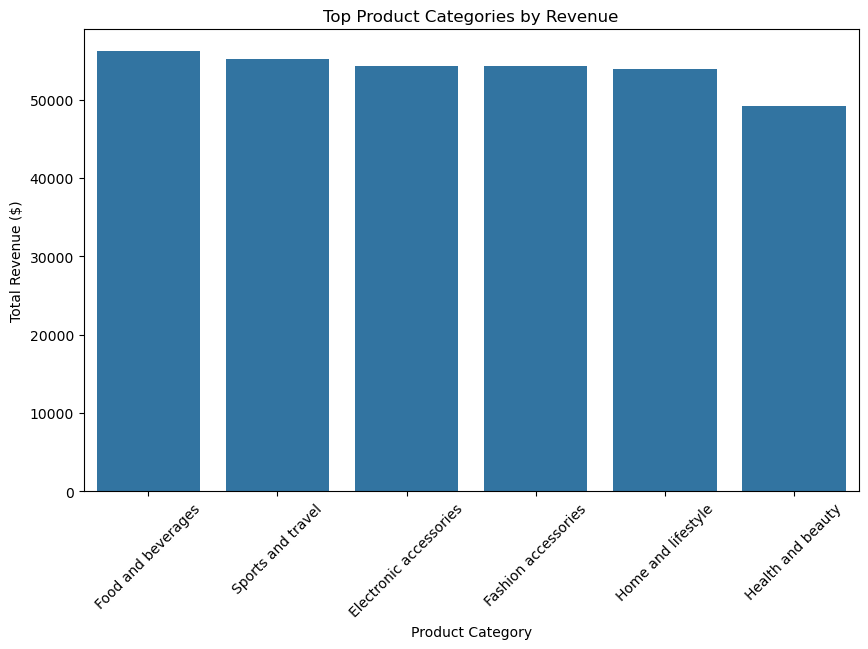

In [30]:
# Top product categories by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales['Total'])
plt.title("Top Product Categories by Revenue")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()

###  Customer Insights: Payment Method Popularity Across Branches

In [31]:
# Count occurrences of each payment method per branch
payment_popularity = data.groupby(['Branch', 'Payment']).size().unstack()

<Figure size 1000x600 with 0 Axes>

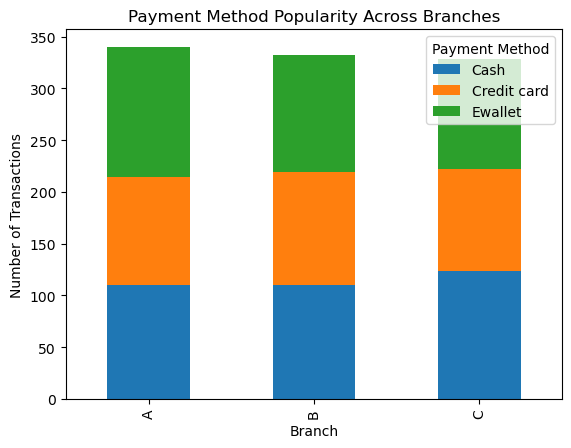

In [32]:
# Payment method popularity by branch
plt.figure(figsize=(10, 6))
payment_popularity.plot(kind='bar', stacked=True)
plt.title("Payment Method Popularity Across Branches")
plt.xlabel("Branch")
plt.ylabel("Number of Transactions")
plt.legend(title="Payment Method")
plt.show();

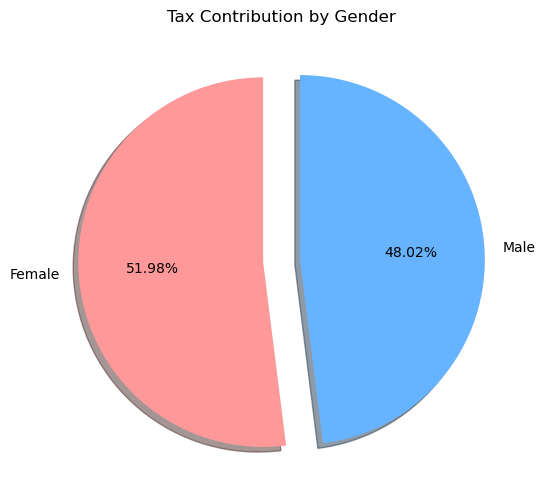

In [48]:
# Group by 'Gender' and calculate the sum of 'Tax 5%'
tax_summary = data.groupby('Gender')['Tax 5%'].sum()

# Sort values in descending order
tax_summary = tax_summary.sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
tax_summary.plot(kind='pie', 
                 explode=[0.1, 0.1],  # Slightly separate the slices
                 labels=tax_summary.index,  # Automatically use index as labels
                 colors=['#ff9999', '#66b3ff'], 
                 autopct='%1.2f%%', 
                 shadow=True, 
                 startangle=90)  # Start angle for better orientation

plt.title('Tax Contribution by Gender')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show();

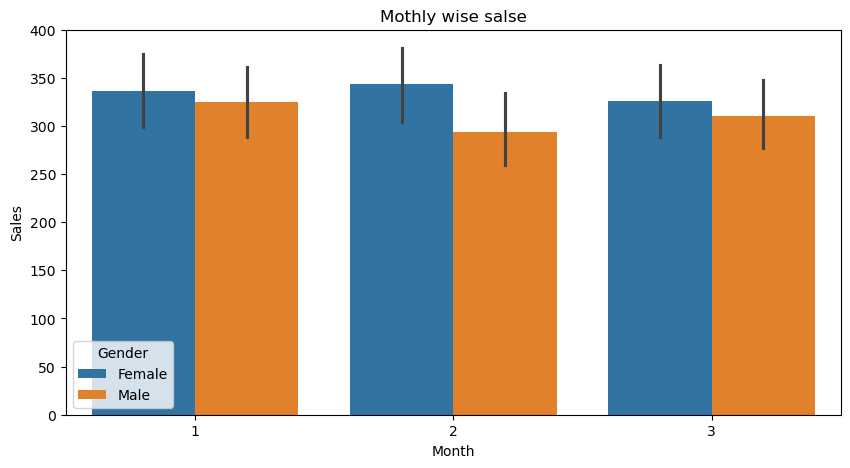

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Month',y='Total',hue='Gender')
plt.title('Mothly wise salse')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## Data Modelling

In [34]:
# !pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.0 MB 62.3 MB/s eta 0:00:01
   ---------------------- ----------------- 6.1/11.0 MB 64.3 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 67.2 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 72.6 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 59.5 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 3.2/44.5 MB 68.8 MB/s eta 0:00:01
   ----- ---------------------------------- 6.1/44.5 MB 65.0 

### Prepare the Data for Modeling

In [35]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [36]:
# Select features and target
features = data[['Product line', 'Quantity', 'Unit price', 'Branch']]
target = data['Total']

In [37]:
# Encode categorical features using OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Product line', 'Branch'])
    ], remainder='passthrough'
)

In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Build and Train the Model

In [39]:
# Create and train a pipeline with Linear Regression model
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [40]:
# Fit the Linear Regression model
linreg_pipeline.fit(X_train, y_train)

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product line',
                                                   'Branch'])])),
                ('model', LinearRegression())])

In [42]:
# Create and train a pipeline with Decision Tree model
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))])

In [43]:
# Fit the Decision Tree model
tree_pipeline.fit(X_train, y_train)

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product line',
                                                   'Branch'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

### Evaluate Model Performance
We'll evaluate each model using Mean Absolute Error (MAE) and Mean Squared Error (MSE)

In [44]:
# Linear Regression model predictions and evaluation
y_pred_linreg = linreg_pipeline.predict(X_test)
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
mse_linreg = mean_squared_error(y_test, y_pred_linreg)

print("Linear Regression Model Performance:")
print("Mean Absolute Error (MAE):", round(mae_linreg, 2))
print("Mean Squared Error (MSE):", round(mse_linreg, 2))

Linear Regression Model Performance:
Mean Absolute Error (MAE): 59.26
Mean Squared Error (MSE): 6345.54


In [45]:
# Decision Tree model predictions and evaluation
y_pred_tree = tree_pipeline.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print("\nDecision Tree Model Performance:")
print("Mean Absolute Error (MAE):", round(mae_tree, 2))
print("Mean Squared Error (MSE):", round(mse_tree, 2))


Decision Tree Model Performance:
Mean Absolute Error (MAE): 6.63
Mean Squared Error (MSE): 111.02


### Insights from Model Performance

- **Decision Tree Model** performed significantly better than the **Linear Regression Model**:
  - **Mean Absolute Error (MAE):** 6.63 vs. 59.26
  - **Mean Squared Error (MSE):** 111.02 vs. 6345.54
  
- The lower error metrics for the **Decision Tree Model** indicate that it better captures the relationships between features (product category, quantity, unit price, branch) and total cost, likely due to its ability to handle non-linear patterns.

### Recommendation

Based on these results, the **Decision Tree Model** is more effective for predicting total purchase cost in this dataset. For future predictive tasks or applications, this model may be a preferred choice over linear regression.

#  Insights and Recommendations

### Summary of Insights from Visuals

1. **Payment Method Popularity Across Branches**:
   - **Cash** is used more frequently in all branches.
   - **Credit Card** and **Ewallet** usage are also common, with no significant difference between branches A, B, and C.
   - Overall, all three branches show a similar pattern in the distribution of payment methods.

2. **Top Product Categories by Quantity Sold**:
   - **Food and Beverages** and **Electronic Accessories** lead in the number of units sold.
   - **Sports and Travel**, **Fashion Accessories**, and **Home and Lifestyle** also perform well, with a slight decline in sales for **Health and Beauty**.

3. **Top Product Categories by Revenue**:
   - **Food and Beverages** and **Sports and Travel** generate the highest revenue.
   - **Electronic Accessories** and **Fashion Accessories** also contribute significantly.
   - **Health and Beauty** ranks the lowest in terms of total revenue.

### Key Takeaways and suggestions:

1. **Sales Dominance**: Food and beverages lead in both quantity sold and revenue, while health and beauty show the least performance, indicating a potential area for growth.

2. **Payment Methods**: Payments are well-distributed among branches, with cash being the preferred method.

3. **Data Distribution**: The dataset is balanced across branches, products, and demographics, allowing for reliable analysis.

4. **Customer Demographics**:
   - **Gender Trends**: Females dominate overall, particularly in Naypyitaw, whereas males lead in Mandalay and Yangon.
   - **Spending Patterns**: Females primarily spend on home & lifestyle and food & beverages, while males focus on health & beauty and sports & travel.

5. **Sales Insights**:
   - **Category Performance**: Food & beverages rank highest in sales, followed by sports & travel, with health & beauty lagging.
   - **Quality Concerns**: High-revenue products often have lower customer ratings, suggesting a need for improvement in quality or service.

6. **Branch and Product Ratings**:
   - **Branch Experience**: Branches A and C have similar ratings, but Branch B stands out, indicating varying customer experiences.
   - **Product Satisfaction**: Food & beverages, fashion accessories, and health & beauty show comparable ratings, reflecting similar levels of customer satisfaction.

7. **Tax Contributions**: The food & beverages, sports, and health sectors are the largest contributors to tax, correlating with their higher sales.

### Recommendations

- **Enhance Health & Beauty Offerings**: Develop targeted marketing strategies and product improvements in the health and beauty category to boost sales and revenue.
  
- **Quality Improvement Initiatives**: Focus on enhancing product quality and customer service for high-revenue items that receive low ratings.

- **Tailored Marketing Strategies**: Utilize demographic insights to create gender-specific marketing campaigns, particularly in branches where one gender predominates.

- **Customer Feedback Mechanism**: Implement a system for gathering customer feedback to better understand the varied experiences across branches and improve service.

- **Explore Alternative Payment Options**: While cash is popular, consider introducing more digital payment methods to accommodate changing customer preferences.
